# 1. Introduction 

## 1.1 About EDA
The **Exploratory Data Analysis (EDA)** consists of analyzing data and extracting useful information from them through visualization techniques. In this way, we can understand the nature of the data and formulate some hypotheses about the information that is available.

In this tutorial, we will learn about how to extract useful informations from datasets. We also will see some basic plots used in the EDA in order to improve our ability to interpret data. We will focus on the analysis of **categorical variables**.

## 1.2 Provided Data used in our EDA

The data is provided by IEEE-CIS for a competition where data scientists are in charge of predicting the probability that an online transaction is fraudulent, as denoted by the binary target "isFraud".  The approach used to make such predictions is called **Supervised Machine Learning**.

As mentioned, our focus here is not to make these predictions  but to act on the phase that precedes it, called  Exploratory Data Analysis. However, in the next topic we will see in a simplified way how a Supervised Machine Learning works and how it could be applied in identifying fraudulent transactions.

The data is broken into two files **Identity** and **Transaction**, which are joined by TransactionID. Below, the categorical variables we will use in our Exploratory Data Analysis.

**Categorical Features - Transaction** 
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

**Categorical Features - Identity**
- DeviceType
- DeviceInfo
- id_12 - id_38

## 1.3 Supervised Machine Learning applied to Fraud Detection

There are several ways of represent a machine learning. Each of them has a number of different stages. Here’s a simple explanation of how a Supervised Machine Learning System would works.

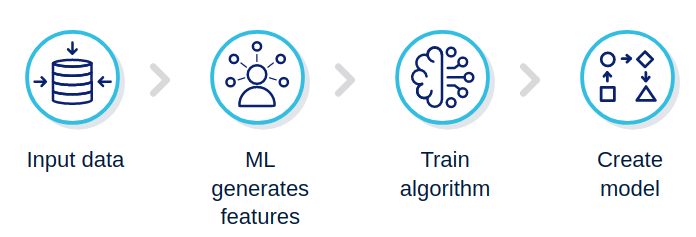

In [86]:
from IPython.display import Image
Image("../3-Imagens/machine_learning.png")

- **Input data:** We are going to explore the provided datasets - Transaction and Identity.
- **ML generates features:** We are going to generates and analyse our final features by joining Transaction and Identity.

- **Train algorithm:** After previous stages the machine learning algorithm uses data described by our final features to learn how to make predictions about the probability that an online transaction is fraudulent.
- **Create model:** When training is complete we have a specific model for our fraud prevention system, which can detect the probability of fraud in a few seconds.<br><br>

In our **Exploratory Data Analysis (EDA)**, we may say that we will only act on the first two stages: **Input data** and **ML generates features**.

After "Train algorithm" and "Create model"  stages the model would have a specific accuracy. The **model accuracy** is the measurement used to determine which model is best at identifying relationships and patterns between variables of the features we generated joining the Input data (Transaction and Identity).

Thats why the EDA is so important. The accuracy is related in  mostly because to the understanding, selecting and preparation of data.

Here’s a simple explanation of why accuracy is so important in a fraud detection. In a fraud detection system we will have three options about fraudulent charges:

- **True positives** (how many fraudsters we block)

- **False positives** (how many good people we block)

- **False negatives** (how many fraudsters we allow)

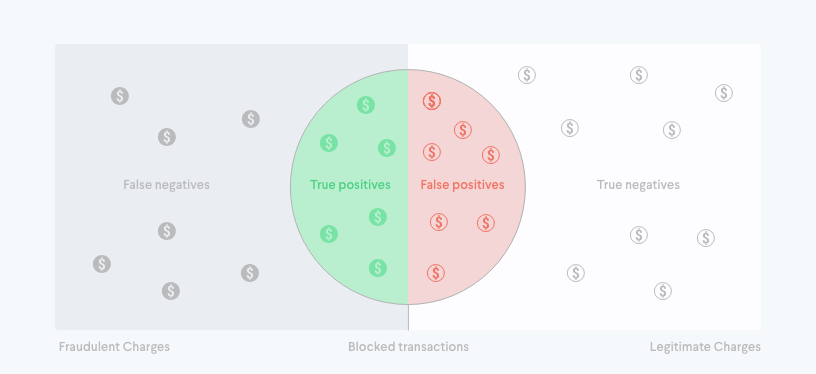

In [87]:
from IPython.display import Image
Image("../3-Imagens/blocked_transactions.jpg")

As will be seen further in our EDA that the vast majority of Transactions are legitimate and we will have few "True positives". So we will need an accurary high enough to ensure we are blocking the least possible amount of genuine charges. 

## 1.4 Adicional necessary libraries and settings

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

# 2. Exploratory Data Analysis

## 2.1 Reading provided data with Categorical Variables

> Transaction ID, Fraud Flag and Timedelta are needed for categorical variables analysis and are also part of the dataset.

In [89]:
transaction = pd.read_csv('../2-Datasets/transaction_git_version.csv')
identity = pd.read_csv('../2-Datasets/identity_git_version.csv')

## 2.2 Transaction dataset

In [90]:
transaction.info()
transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  590540 non-null  int64  
 1   isFraud        590540 non-null  int64  
 2   TransactionDT  590540 non-null  int64  
 3   ProductCD      590540 non-null  object 
 4   card1          590540 non-null  int64  
 5   card2          581607 non-null  float64
 6   card3          588975 non-null  float64
 7   card4          588963 non-null  object 
 8   card5          586281 non-null  float64
 9   card6          588969 non-null  object 
 10  addr1          524834 non-null  float64
 11  addr2          524834 non-null  float64
 12  P_emaildomain  496084 non-null  object 
 13  R_emaildomain  137291 non-null  object 
 14  M1             319440 non-null  object 
 15  M2             319440 non-null  object 
 16  M3             319440 non-null  object 
 17  M4             309096 non-nul

,TransactionID,isFraud,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.3 Identity dataset

In [91]:
identity.info()
identity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_12          144233 non-null  object 
 2   id_13          127320 non-null  float64
 3   id_14          80044 non-null   float64
 4   id_15          140985 non-null  object 
 5   id_16          129340 non-null  object 
 6   id_17          139369 non-null  float64
 7   id_18          45113 non-null   float64
 8   id_19          139318 non-null  float64
 9   id_20          139261 non-null  float64
 10  id_21          5159 non-null    float64
 11  id_22          5169 non-null    float64
 12  id_23          5169 non-null    object 
 13  id_24          4747 non-null    float64
 14  id_25          5132 non-null    float64
 15  id_26          5163 non-null    float64
 16  id_27          5169 non-null    object 
 17  id_28          140978 non-nul

,TransactionID,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


## 2.4 Joining Transaction and Identity datasets

The Exploratory Data Analysis is unavoidable and one of the major step to fine-tune the given datasets in a different way of analysis. Thus we can understand the insights of the key characteristics of various entities of the dataset like columns and rows. In our aproach we are going to join the two provided datasets in order to understand the informations as a whole.

In [92]:
transaction_joined = transaction.merge(identity, how = "left", on = "TransactionID", indicator = "merge")
transaction_joined.head()

,TransactionID,isFraud,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,merge
0,2987000,0,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2987001,0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2987002,0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2987003,0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2987004,0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,both


In [93]:
transaction_joined[transaction_joined['merge'] == 'left_only']

,TransactionID,isFraud,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,merge
0,2987000,0,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2987001,0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2987002,0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2987003,0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,2987005,0,86510,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,NaN,NaN,T,T,T,M0,T,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
590536,3577536,0,15811049,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,gmail.com,NaN,T,F,F,M0,F,T,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
590537,3577537,0,15811079,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,gmail.com,NaN,T,F,F,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
590538,3577538,0,15811088,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,aol.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## 2.5 Joining Conclusion

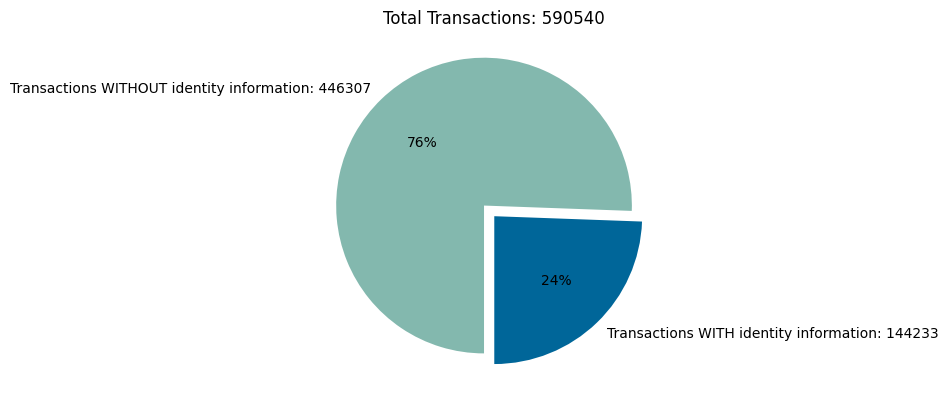

In [94]:
# Transactions with corresponding identity information
transaction_with_identity = transaction_joined[transaction_joined["merge"]=="both"].shape[0]


#  Transactions without corresponding identity information
transaction_without_identity = transaction_joined[transaction_joined["merge"]=="left_only"].shape[0]

values = [transaction_with_identity, transaction_without_identity]
labels = ["Transactions WITH identity information: " + str(transaction_with_identity), "Transactions WITHOUT identity information: " + str(transaction_without_identity)]
explode = (0, 0.1)
colors = ['#006699','#83B8AE']
           
fig, ax = plt.subplots()
ax.set_title("Total Transactions: " + str(transaction_joined.shape[0]))
ax.pie(values, explode=explode, labels = labels, colors = colors, autopct = "%1.0f%%", shadow=False, startangle=-90);

**Not all Transactions have corresponding Identity information.**<br>
We have a total of 590540 transactions, among then 76% have no Identity information.
<br><br>
This way, important informations from fraudulant or legitimate charges are not available, including:
* **Operating System (OS)** used in the transaction like *'Windows'* or *'MacOS'*

* **Device Type** used in the transaction like *'Mobile'* or *'Desktop'*

* **Browser** used in the transaction like *'Safari'* or *'Chrome'*

## 2.6 Missing Values

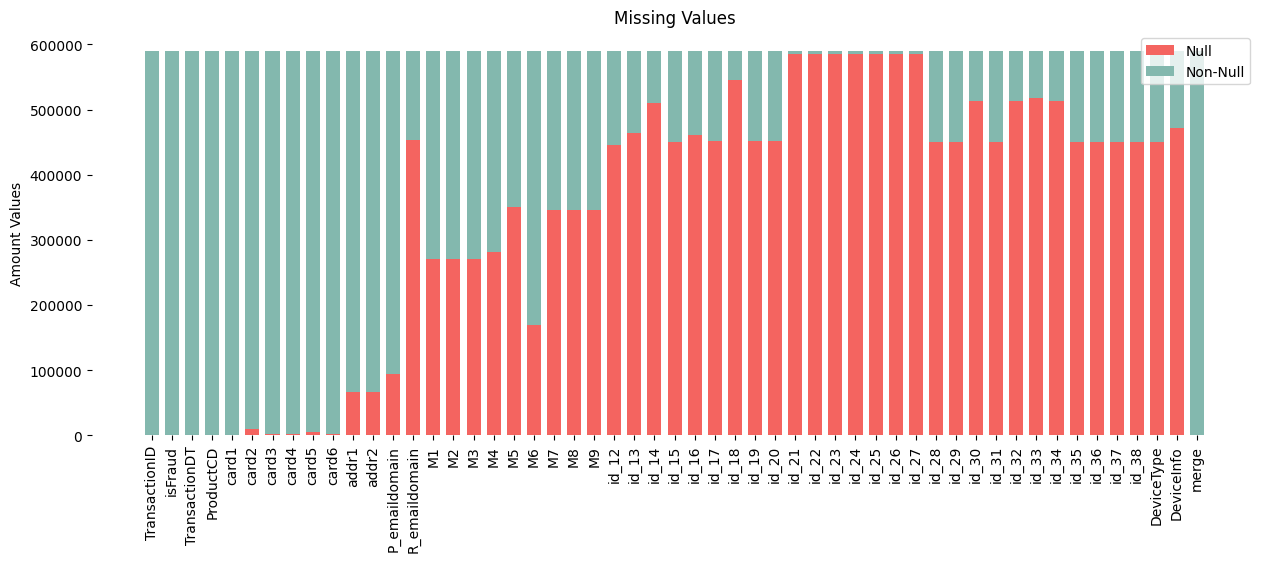

In [95]:
transaction_joined_null_bool = transaction_joined.isnull()
transaction_joined_labels = []
transaction_joined_null_freq = []
transaction_joined_non_null_freq = []
    
for column in transaction_joined_null_bool:
    
    transaction_joined_labels.append(column)
    
    try:
        transaction_joined_null_freq.append(transaction_joined_null_bool[column].value_counts().loc[True])
    except KeyError:
            transaction_joined_null_freq.append(0.0)
    try:   
        transaction_joined_non_null_freq.append(transaction_joined_null_bool[column].value_counts().loc[False])
    except KeyError:
        transaction_joined_non_null_freq(0.0) 

# Stacked bar chart
fig, ax = plt.subplots()
width = 0.35

ax.bar(transaction_joined_labels, transaction_joined_null_freq, width*2, label='Null', color='#F46460')
ax.bar(transaction_joined_labels, transaction_joined_non_null_freq, width*2, bottom=transaction_joined_null_freq, label='Non-Null', color='#83B8AE')

ax.set_ylabel('Amount Values')
ax.set_title('Missing Values')
ax.legend(frameon=True)
ax.set_frame_on(False)

# Show plot
fig.tight_layout(rect=(0, 0, 2, 1))
plt.xticks(rotation=90)
plt.show();

📌Note:<br> 
>As a result of not have all corresponding Identity information, we have a huge amount of missing values from **"id_12"** to **"DeviceInfo"** columns.

## 2.7 Card Labels relative frequencies

In [96]:
transaction_joined["card4"].value_counts(1)
transaction_joined["card6"].value_counts(1)

card4
visa                0.653296
mastercard          0.321271
american express    0.014140
discover            0.011293
Name: proportion, dtype: float64

card6
debit              0.746963
credit             0.252961
debit or credit    0.000051
charge card        0.000025
Name: proportion, dtype: float64

## 2.8 Card Labels and Payment Methods Plots

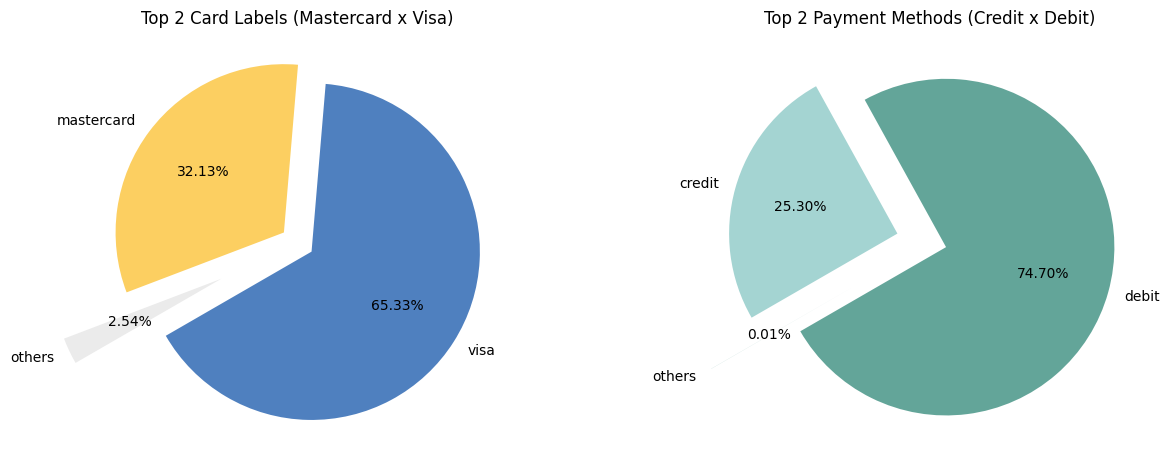

In [97]:
# Card Labels
cardlabel = transaction_joined["card4"].value_counts().nlargest(2) 
cardlabel["others"] = transaction_joined["card4"].value_counts().nsmallest(2).sum() # Adding the Others item
cardlabel
values_cardlabel = cardlabel.values
labels_cardlabel = cardlabel.index
explode_cardlabel = (0.1, 0.1, 0.5)
colors_cardlabel = ('#4F80BF','#FCCF61','#EBEBEB')

# Payment Methods (showing just the 2 largest because the others together account for less than 0.01% of the total, see Out[12])
paymentmethods = transaction_joined["card6"].value_counts().nlargest(2) 
paymentmethods["others"] = transaction_joined["card6"].value_counts().nsmallest(2).sum() # Adding the Others item
values_paymentmethods = paymentmethods.values
labels_paymentmethods = paymentmethods.index
explode_paymentmethods = (0.1, 0.2, 0.5)
colors_paymentmethods = ('#63A599','#A4D4D2')



# Pie charts
fig, ax = plt.subplots(1,2)
fig.tight_layout(rect=(0, 0, 2, 1))
ax[0].set_title("Top 2 Card Labels (Mastercard x Visa)")
ax[0].pie(values_cardlabel, explode=explode_cardlabel, labels = labels_cardlabel, colors = colors_cardlabel, autopct = "%1.2f%%", startangle=210)

ax[1].set_title("Top 2 Payment Methods (Credit x Debit)")
ax[1].pie(values_paymentmethods, explode=explode_paymentmethods, labels = labels_paymentmethods, colors = colors_paymentmethods, autopct = "%1.2f%%", startangle=210);

* Together, the **Visa** and **Mastercard** card labels represent the vast majority of **97.46%** of transactions.

* The **Visa** card label represents almost **2/3** of transactions.

* Together, the **Credit** and **Debit** payment methods represent almost  **100%** of transactions.

* The **Debit** payment method represent almost **3/4** of transactions.

## 2.9 Comparing Fraudulent and Legitimate transactions

### 2.9.1 Absolute frequencies of Fraudulent and Legitimate transactions

In [98]:
cardlabels_grouped = transaction_joined.groupby(['card4','card6', 'isFraud']).size()
cardlabels_grouped

card4             card6            isFraud
american express  charge card      0               3
                  credit           0            7941
                                   1             234
                  debit            0             139
                                   1               5
discover          credit           0            5804
                                   1             500
                  debit            0             333
                                   1              14
mastercard        credit           0           47261
                                   1            3511
                  debit            0          135430
                                   1            2985
                  debit or credit  0              30
visa              charge card      0              12
                  credit           0           78028
                                   1            5704
                  debit            0          293354
   

### 2.9.2 Fraudulent and Legitimate transactions Plots

>As we saw in the previous pie plots, **Visa** and **Mastercard** card labels represent the vast majority of **97.46%** of transactions. So let's take a closer look at them.

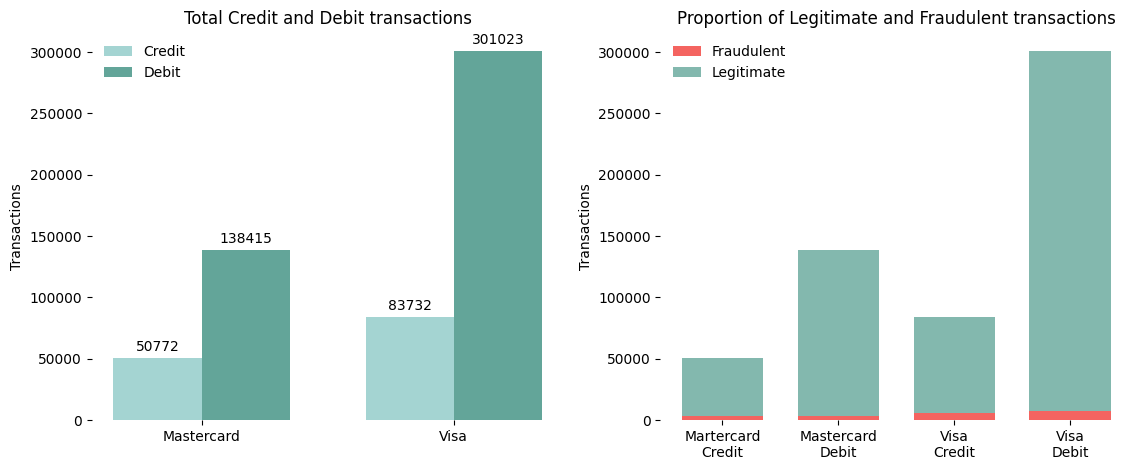

In [99]:
# Bar chart
labels_bar = ['Mastercard', 'Visa']
credit_sum = [cardlabels_grouped["mastercard"]["credit"].sum(), cardlabels_grouped["visa"]["credit"].sum()]
debit_sum = [cardlabels_grouped["mastercard"]["debit"].sum(), cardlabels_grouped["visa"]["debit"].sum()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2)

rects1 = ax[0].bar(x - width/2, credit_sum, width, label='Credit', color='#A4D4D2')
rects2 = ax[0].bar(x + width/2, debit_sum, width, label='Debit', color='#63A599')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Transactions')
ax[0].set_title('Total Credit and Debit transactions')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels_bar)
ax[0].legend(frameon=False)
ax[0].set_frame_on(False)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

# Stacked bar chart
labels_stacked = ['Martercard\nCredit', 'Mastercard\nDebit', 'Visa\nCredit', 'Visa\nDebit']
fraudulent = [cardlabels_grouped["mastercard"]["credit"][1].sum(), cardlabels_grouped["mastercard"]["debit"][1].sum(), cardlabels_grouped["visa"]["credit"][1].sum(), cardlabels_grouped["visa"]["debit"][1].sum()]
legitimate = [cardlabels_grouped["mastercard"]["credit"][0].sum(), cardlabels_grouped["mastercard"]["debit"][0].sum(), cardlabels_grouped["visa"]["credit"][0].sum(), cardlabels_grouped["visa"]["debit"][0].sum()]

ax[1].bar(labels_stacked, fraudulent, width*2, label='Fraudulent', color='#F46460')
ax[1].bar(labels_stacked, legitimate, width*2, bottom=fraudulent, label='Legitimate', color='#83B8AE')

ax[1].set_ylabel('Transactions')
ax[1].set_title('Proportion of Legitimate and Fraudulent transactions')
ax[1].legend(frameon=False)
ax[1].set_frame_on(False)

# Show plot
fig.tight_layout(rect=(0, 0, 1.8, 1))
plt.show();

* At both **Mastercard** and **Visa** we see a predominance of **Debit** transactions.

* The vast majority of transactions are **legitimate**.
<br><br>

**📌However, we noticed an interesting point:**<br>

> The number of **Credit** transactions is lower but it appears that there is a higher proportion of fraud in this type of transaction. Let's get a better look through the pie plot below.


### 2.9.3 A better way to visualize the Proportion of Legitimate and Fraudulent transactions

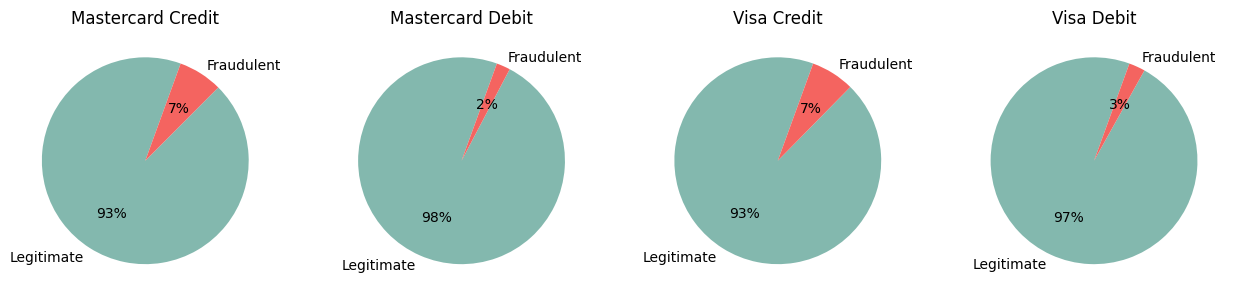

In [100]:
# Mastercard Credit
values_mastercard_credit = (cardlabels_grouped["mastercard"]["credit"][0], cardlabels_grouped["mastercard"]["credit"][1])
labels_mastercard_credit = ('Legitimate', 'Fraudulent')
colors_mastercard_credit = ('#83B8AE','#F46460')

# Mastercard Debit
values_mastercard_debit = (cardlabels_grouped["mastercard"]["debit"][0], cardlabels_grouped["mastercard"]["debit"][1])
labels_mastercard_debit = ('Legitimate', 'Fraudulent')
colors_mastercard_debit = ('#83B8AE','#F46460')

# Visa Credit
values_visa_credit = (cardlabels_grouped["visa"]["credit"][0], cardlabels_grouped["visa"]["credit"][1])
labels_visa_credit = ('Legitimate', 'Fraudulent')
colors_visa_credit = ('#83B8AE','#F46460')

# Visa Debit
values_visa_debit = (cardlabels_grouped["visa"]["debit"][0], cardlabels_grouped["visa"]["debit"][1])
labels_visa_debit = ('Legitimate', 'Fraudulent')
colors_visa_debit = ('#83B8AE','#F46460')

# Pie charts
fig, ax = plt.subplots(1,4)
fig.tight_layout(rect=(0, 0, 2, 1))
ax[0].set_title("Mastercard Credit")
ax[0].pie(values_mastercard_credit, labels = labels_mastercard_credit, colors = colors_mastercard_credit, autopct = "%1.0f%%", startangle=70)
ax[1].set_title("Mastercard Debit")
ax[1].pie(values_mastercard_debit, labels = labels_mastercard_debit, colors = colors_mastercard_debit, autopct = "%1.0f%%", startangle=70)

ax[2].set_title("Visa Credit")
ax[2].pie(values_visa_credit, labels = labels_visa_credit, colors = colors_visa_credit, autopct = "%1.0f%%", startangle=70)
ax[3].set_title("Visa Debit")
ax[3].pie(values_visa_debit, labels = labels_visa_debit, colors = colors_visa_debit, autopct = "%1.0f%%", startangle=70);

>As we have noted, there is a higher proportion of fraudulent transactions in **Credit** charges.

# 3. Conclusion

Although we only did an initial **Exploratory Data Analysis**, we can list some of the many benefits of having EDA always in focus:

- Intuitive data visualization through plots.
- Find missing values.
- Look for correlations between datasets.
- Better understanding of how business process  is performed currently.
- Better insight into the business issues we intend to solve.

# 4. References
[https://www.kaggle.com/c/ieee-fraud-detection](http://)

[https://www.ravelin.com/insights/machine-learning-for-fraud-detection](http://)

https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/